<a href="https://colab.research.google.com/github/msmirikar22/The-Sparks-Foundation-/blob/main/TASK2_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 2 - Prediction using Supervised ML**
**Name:** MADHURA MIRIKAR

**Email Id**: madhura.mirikar@gmail.com

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [ ]:
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#To display top 5 rows
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#To display bottom 5 rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# To view some basic statistical details.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Mean:  51.48 
Median:  47.0 
Mode:  30


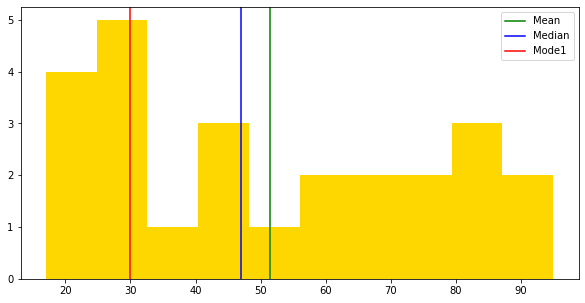

In [ ]:

#To calculate mean,median,mode.
mean= df['Scores'].mean()
median=df['Scores'].median()
mode=df['Scores'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(df['Scores'],bins=10,color='gold') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')    
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')

#plt.xlabel('Income')   label the x-axis
#plt.ylabel('Frequency')    label the y-axis
plt.legend()              # Plot the legend
plt.show()

# EDA (Exploratory Data Analysis)

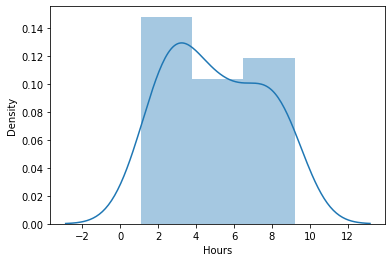

In [ ]:
sns.distplot(df.Hours)
##Hours has a symmetric distribution.

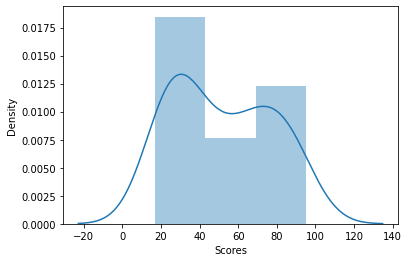

In [ ]:
sns.distplot(df.Scores)
##Scores has a symmetric distribution.

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

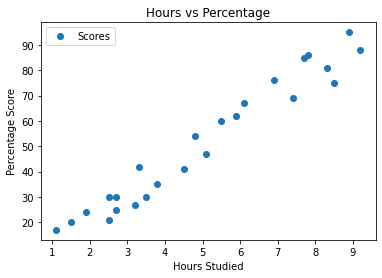

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

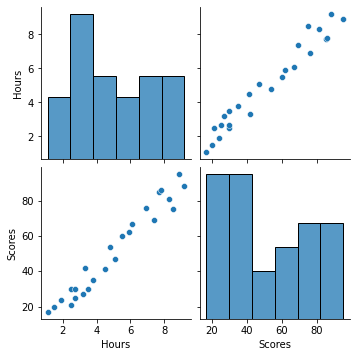

In [ ]:
# Pair Plot
sns.pairplot(df)
plt.show()

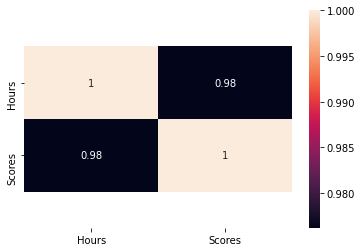

In [ ]:
# Plotting heat map
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


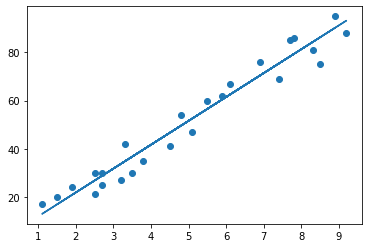

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(np.array([hours]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [ ]:
# Accuracy of train data
regressor.score(X_train, y_train)

0.9515510725211553

In [ ]:
# Accuracy of test data
regressor.score(X_test,y_test)

0.9454906892105354

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

The various metrics used to evaluate the results of the prediction are :

1.Mean Squared Error(MSE)
2. Root-Mean-Squared-Error(RMSE).
3. Mean-Absolute-Error(MAE).
4. R² or Coefficient of Determination.
5. Adjusted R²




In [ ]:
from sklearn import metrics  


0.9454906892105354

In [ ]:
from sklearn import metrics

print("Mean Squared Error :",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test, y_pred))
print("R² or Coefficient of Determination :",metrics.r2_score(y_test,y_pred))




Mean Squared Error : 21.598769307217456
Root Mean Squared Error : 4.647447612100373
Mean Absolute Error : 4.183859899002982
R² or Coefficient of Determination : 0.9454906892105354


In [ ]:
from sklearn.metrics import r2_score   
r2_score(y_test, y_pred)   
print(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

0.9273209189473804
